# Complicated Model

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
import sympy as sm
from IPython.display import display, Math
import os
import math

In [20]:
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM =  1 / 93.6   # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1
alpha=0.1
######
# Calculations based on the parameters
etha0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######

# Time parameters for system integration
t_0 = 0             # Initial time
t_fin = 700         # Final time
pas_t = 0.001       # Time step
t = np.arange(t_0, t_fin, pas_t)  # Time period

In [21]:
output_fold = os.getcwd() + r'\output'

In [22]:
#definir le systeme d'equations differentiels
def model_ds(X,t,Ms):
    L = X[0] #larves
    M = X[1] #Males fertilisées
    V = X[2] #femelles vierges
    F = X[3] #females mated with wild males
    #systèmes d'équations differentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    if Ms==0:
        V_dot = (1-m)*vL*L + delta*F - (uF+vF*min((gamma*M/V),1))*V
        F_dot = vF*min((gamma*M/V),1)*V - (uF+delta)*F
        return np.array([L_dot,M_dot,V_dot,F_dot])
    if Ms != 0:
        S = X[4] #females mated with steriles
        V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF)*V
        F_dot = vF*M/(M+Ms)*V - (uF+delta)*F
        S_dot = vF*Ms/(M+Ms)*V - (uF+gamma)*S
        #vecteurs
        return np.array([L_dot,M_dot,V_dot,F_dot,S_dot])


### - Simulation of the system dynamics.

In [34]:
def dynamic_ds(X0, Ms, name="dynamic_base", graph=True):
    # Solving the system
    X = integrate.odeint(model_ds, X0, t, args=(Ms,), hmax=pas_t)
    
    # Case where no release occurs
    if Ms == 0:
        L, M, V, F = X.T
        
        if graph == True:
            # Create a new figure
            fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
            plt.plot(t, L, 'g--')  # Larva
            plt.plot(t, V, 'b-')   # Virgin
            plt.plot(t, M, 'y-.')  # Male
            plt.plot(t, F, 'r-')   # Fertilized
            
            # Curve labels
            plt.plot(0, 'g--', label='Larva')
            plt.plot(0, 'b-', label='Virgin')
            plt.plot(0, 'y-.', label='Males')
            plt.plot(0, 'r-', label='Females')
            
            # Figure title
            fig.suptitle("Population's Dynamics Without release")
            plt.xlabel('time')
            plt.grid()
            plt.legend(loc='best')
            
            # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
            
            fig = plt.figure(figsize=(8, 3))
            
        # Plot the population dynamics over time
            plt.plot(M, V, 'b-.')  # Male vs Fertilized
        # Plot the line x=y
            plt.plot(M, M, 'k-', label='x=y')
            
        # Curve labels
       # plt.plot(0, 0, 'b-.', label='Male')
            
        # Figure title and axis labels
            fig.suptitle("Males vs Females numbers")
            plt.xlabel('Males')
            plt.ylabel('Females')
            plt.grid()
            plt.legend(loc='best')
            
        # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
    else:
        L, M, V, F, S = X.T
        
        if graph == True:
            # Create a new figure
            fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
            plt.plot(t, L, 'g--')  # Larva
            plt.plot(t, V, 'b-')   # Virgin
            plt.plot(t, M, 'y-.')  # Male
            plt.plot(t, F, 'r-')   # Fertilized
            plt.plot(t, S, 'c-')   # Fertilized by a sterile male
            
            # Curve labels
            plt.plot(0, 'c-', label='Fertilized by a sterile male')
            plt.plot(0, 'g--', label='Larva')
            plt.plot(0, 'b-', label='Virgin')
            plt.plot(0, 'y-.', label='Male')
            plt.plot(0, 'r-', label='Fertilized')
            
            # Figure title
            fig.suptitle("Population's Dynamics with Sterile males Release (second model)")
            plt.xlabel('time')
            plt.grid()
            plt.legend(loc='best')
            
            # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)

# system dynamics: without SIT model

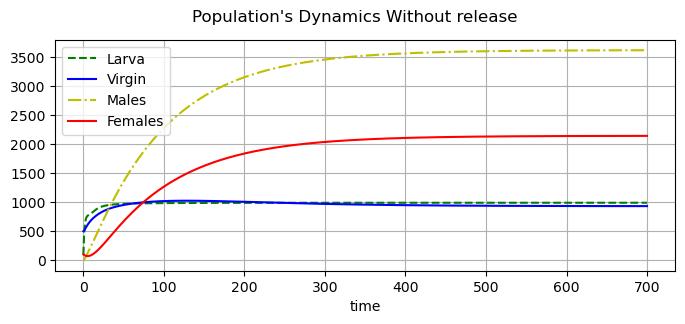

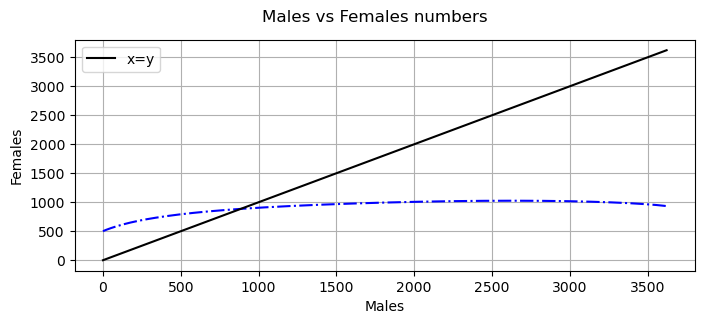

In [35]:
#Initial conditions
#males scarcity
X0_base = [100, 0, 500, 100]# L, M, V, F

#System dynamics
Mb = dynamic_ds(X0_base, Ms=0, name="without_SIT_complexe_dynamics 4 compartement males scarcity")

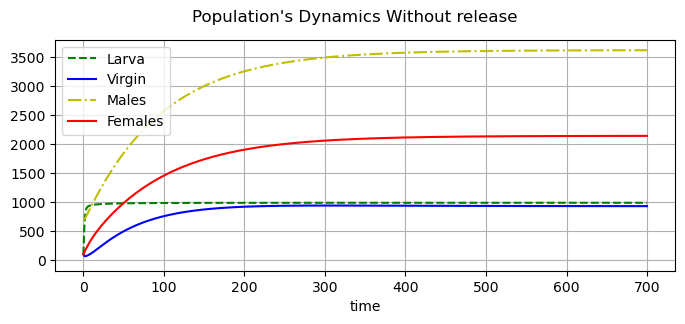

In [26]:
#Initial conditions
#males abundancy
X0_base = [100, 700, 100, 100]# L, M, V, F

#System dynamics
Mb = dynamic_ds(X0_base, Ms=0, name="without_SIT_complexe_dynamics 4 compartement males abundancy")

# system dynamics: SIT males model

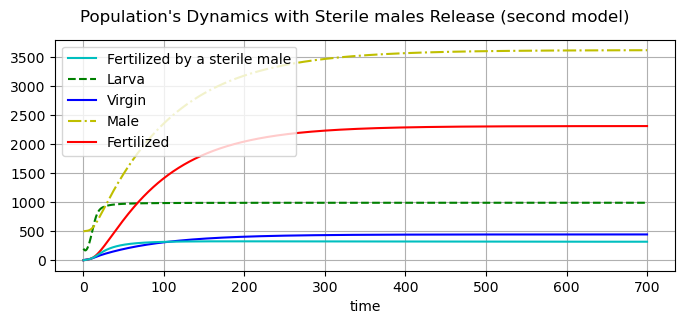

In [7]:
#initial conditions
X0_tis = [200,500,0,0,0]
dynamic_ds(X0_tis,Ms=500,name="SIT_dynamics")

# Releasing both males and Females

In [8]:
#definir le systeme d'equations differentiels
def model_rel(X,t,Ms,Fs):
    L = X[0] #larves
    M = X[1] #Males fertilisées
    V = X[2] #femelles vierges
    F = X[3] #females mated with wild males
    
    #systèmes d'équations differentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    if Ms==0 and Fs==0:
        V_dot = (1-m)*vL*L + delta*F - (uF+vF)*V
        F_dot = vF*min((gamma*M/V),1)*V - (uF+delta)*F
        return np.array([L_dot,M_dot,V_dot,F_dot])
    if Ms != 0 and Fs==0:
        S = X[4] #females mated with steriles
        V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF)*V
        F_dot = vF*M/(M+Ms)*V - (uF+delta)*F
        S_dot = vF*Ms/(M+Ms)*V - (uF+gamma)*S
        #vecteurs
        return np.array([L_dot,M_dot,V_dot,F_dot,S_dot])
    if Ms != 0 and Fs!=0:
        S = X[4] #females mated with steriles
        Ms = Ms + X[5] #sterile females
        Fs = Fs + X[6] #sterile females
        Ss = X[7] #females mated with steriles
        V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF*(M/(M+Ms)*V/(V+Fs)+Ms/(M+Ms)*V/(V+Fs)))*V
        F_dot = vF*M/(M+Ms)*V/(V+Fs)*V - (uF+delta)*F
        S_dot = vF*Ms/(M+Ms)*V/(V+Fs)*V - (uF+gamma)*S
        Ms_dot = Ms - uM*Ms
        if (M + Ms) != 0 and (V + Fs) != 0:
            Fs_dot= Fs + alpha*Ss-(uF+vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs)))
        else:
            Fs_dot = 0
        if (M + Ms) != 0 and (V + Fs) != 0:
            Ss_dot = vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs))*Fs-(uF+alpha)*Ss
        else:
            Ss_dot = 0
        return np.array([L_dot, M_dot, V_dot, F_dot, S_dot, Ms_dot ,  Fs_dot ,Ss_dot ])

In [9]:
def dynamic_rel(X0, Ms, Fs, name="dynamic_base", graph=True):
    # Solving the system
    X = integrate.odeint(model_rel, X0, t, args=(Ms,Fs), hmax=pas_t)
    
    # Case where no release occurs
    if Ms == 0 and Fs == 0:
        L, M, V, F = X.T
        
        if graph == True:
            # Create a new figure
            fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
            plt.plot(t, L, 'g--')  # Larva
            plt.plot(t, V, 'b-')   # Virgin
            plt.plot(t, M, 'y-.')  # Male
            plt.plot(t, F, 'r-')   # Fertilized
            
            # Curve labels
            plt.plot(0, 'g--', label='Larva')
            plt.plot(0, 'b-', label='Virgin')
            plt.plot(0, 'y-.', label='Males')
            plt.plot(0, 'r-', label='Females')
            
            # Figure title
            fig.suptitle("Population's Dynamics Without release")
            plt.xlabel('time')
            plt.grid()
            plt.legend(loc='best')
            
            # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
            
    if Ms != 0 and Fs == 0:
        L, M, V, F, S = X.T
        
        if graph == True:
            # Create a new figure
            fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
            plt.plot(t, L, 'g--')  # Larva
            plt.plot(t, V, 'b-')   # Virgin
            plt.plot(t, M, 'y-.')  # Male
            plt.plot(t, F, 'r-')   # Fertilized
            plt.plot(t, S, 'c-')   # Fertilized by a sterile male
            
            # Curve labels
            plt.plot(0, 'c-', label='Fertilized by a sterile male')
            plt.plot(0, 'g--', label='Larva')
            plt.plot(0, 'b-', label='Virgin')
            plt.plot(0, 'y-.', label='Male')
            plt.plot(0, 'r-', label='Fertilized')
            
            # Figure title
            fig.suptitle("Population's Dynamics with Sterile males Release (second model)")
            plt.xlabel('time')
            plt.grid()
            plt.legend(loc='best')
            
            # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
                
    if Ms != 0 and Fs != 0:
        L, M, V, F, S, Ms, Fs, Ss = X.T
        
        if graph == True:
            # Create a new figure
            fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
            plt.plot(t, L, 'g--')  # Larva
            plt.plot(t, V, 'b-')   # Virgin
            plt.plot(t, M, 'y-.')  # Male
            plt.plot(t, F, 'r-')   # Fertilized
            plt.plot(t, S, 'c-')   # Fertilized by a sterile male
           # plt.plot(t, Ms, 'y-.')  # sterile Male
            #plt.plot(t, Fs, 'r-')   # sterile females
           # plt.plot(t, Ss, 'c-')   # sterile Fertilized
            # Curve labels
            plt.plot(0, 'c-', label='Fertilized by a sterile male')
            plt.plot(0, 'g--', label='Larva')
            plt.plot(0, 'b-', label='Virgin')
            plt.plot(0, 'y-.', label='Male')
            plt.plot(0, 'r-', label=' Fertilized')
            #plt.plot(0, 'b-', label='sterile females')
            #plt.plot(0, 'y-.', label='sterile Male')
            #plt.plot(0, 'r-', label='sterile Fertilized')
            
            # Figure title
            fig.suptitle("Population's Dynamics with Sterile males and female Releases (second model)")
            plt.xlabel('time')
            plt.grid()
            plt.legend(loc='best')
            
            # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)

C:\Users\Tahour\AppData\Local\Temp\ipykernel_10808\2454598732.py:32: RuntimeWarning: overflow encountered in scalar add
  Fs_dot= Fs + alpha*Ss-(uF+vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs)))
C:\Users\Tahour\AppData\Local\Temp\ipykernel_10808\2454598732.py:32: RuntimeWarning: invalid value encountered in scalar divide
  Fs_dot= Fs + alpha*Ss-(uF+vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs)))
C:\Users\Tahour\AppData\Local\Temp\ipykernel_10808\2454598732.py:36: RuntimeWarning: invalid value encountered in scalar divide
  Ss_dot = vF*(M/(M+Ms)*Fs/(V+Fs)+Ms/(M+Ms)*Fs/(V+Fs))*Fs-(uF+alpha)*Ss
c:\Users\Tahour\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


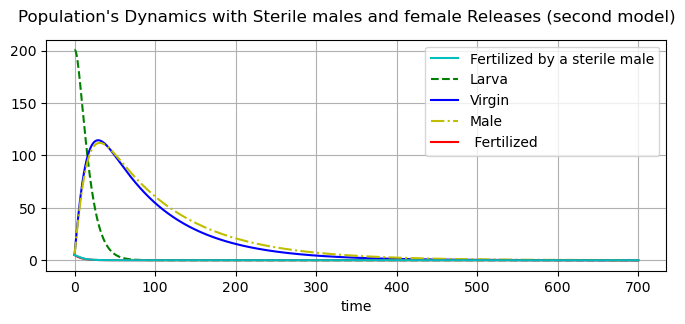

In [10]:
#initial conditions
X0_rel_tis = [200,5,5,5,5,5,5,5]
dynamic_rel(X0_rel_tis,Ms=200,Fs=200,name="releasing malesandfemales_SIT_dynamics")

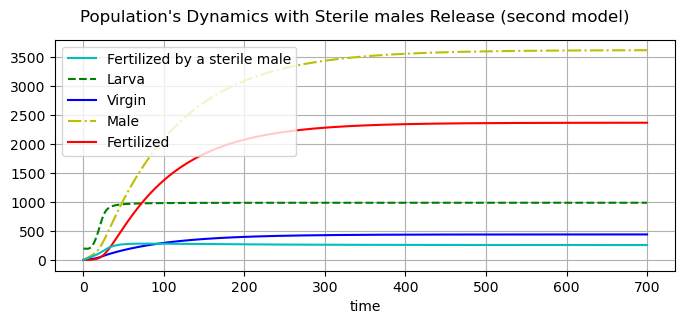

In [11]:
#initial conditions
X0_rel_tis = [200,5,5,5,5]
dynamic_rel(X0_rel_tis,Ms=400,Fs=0,name="males_SIT_dynamics")

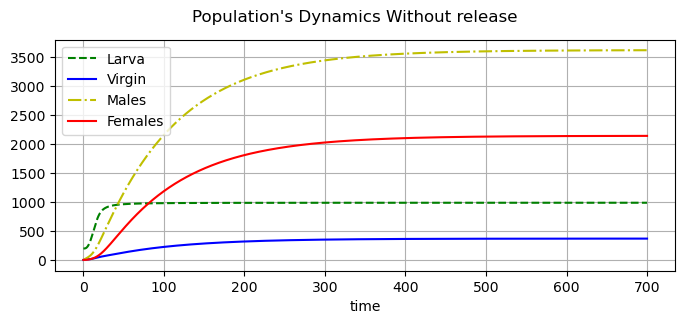

In [12]:
#initial conditions
X0_rel_tis = [200,5,5,5]
dynamic_rel(X0_rel_tis,Ms=0,Fs=0,name="dynamics")

# Equilibrium points and its stability

# 1) Second model only male releases

In [15]:
# model with only males release
from sympy import symbols, Eq, solve, re, im

# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1
################################# Males and females number 
Fs = 200
Ms = 5000
##################################
# Define the symbolic variables
L, M, V, F, S = symbols('L M V F S')

# Define the equations
M_term = (M / (M + Ms)) if Ms != 0 else 1.0
Ms_term = (Ms / (M + Ms)) if Ms != 0 else 0.0

L_dot = b * (1 - (L / K)) * F - (vL + uL) * L
M_dot = m * vL * L - uM * M
V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF)*V
F_dot = vF*M/(M+Ms)*V - (uF+delta)*F
S_dot = vF*Ms/(M+Ms)*V - (uF+gamma)*S
# Define the system of equations
equations = [
    Eq(L_dot, 0),
    Eq(M_dot, 0),
    Eq(V_dot, 0),
    Eq(F_dot, 0),
    Eq(S_dot, 0)
]

# Solve the system of equations and obtain all solutions
solutions = solve(equations, (L, M, V, F, S))

# Filter out the real solutions and set small imaginary parts to zero
real_solutions = []
threshold = 1e-5

for sol in solutions:
    is_real_solution = True
    modified_sol = {}
    for var in range(0,5):
        val = sol[var]
        if im(val).evalf() > threshold:
            is_real_solution = False
            break
        elif abs(im(val).evalf()) <= threshold:
            modified_sol[var] = re(val).evalf()
    if is_real_solution:
        real_solutions.append(modified_sol)
#print(real_solutions)
# Print the real solutions
for sol in real_solutions:
    print("Equilbirum points:")
    print(f"L*: {sol[0]}")
    print(f"M*: {sol[1]}")
    print(f"V*: {sol[2]}")
    print(f"F*: {sol[3]}")
    print(f"S*: {sol[4]}")
    print()

Equilbirum points:
L*: 0
M*: 0
V*: 0
F*: 0
S*: 0

Equilbirum points:
L*: 9.86028306478311
M*: 36.0516599556132
V*: 4.42382838205578
F*: 0.187536667554999
S*: 26.0094358742279

Equilbirum points:
L*: 983.051588616889
M*: 3594.28237088050
V*: 441.047329998135
F*: 1092.29666016606
S*: 1519.49199792346



In [16]:
import sympy as sm
import numpy as np
import numpy.linalg as linalg

# Convert equations to matrix form and calculate the Jacobian matrix
eqMat = sm.Matrix([L_dot, M_dot, V_dot, F_dot, S_dot])
Mat = sm.Matrix([L, M, V, F, S])
jacMat = eqMat.jacobian(Mat)
print('Jacobian matrix:\n', jacMat)

# Calculate equilibria
equilibria = real_solutions

# Iterate over the equilibria
for eq in equilibria:
    # Substitute equilibrium values into the Jacobian matrix and obtain eigenvalues
    eqmat = np.array(jacMat.subs([(L, eq[0]), (M, eq[1]), (V, eq[2]), (F, eq[3]), (S, eq[4])])).astype(np.float64)
    eigenValues, eigenVectors = linalg.eig(eqmat)

    print('-------------------------------------------')
    print("The real parts of the eigenvalues for the fixed point (%s, %s, %s, %s, %s) are:" % (eq[0], eq[1], eq[2], eq[3], eq[4]), eigenValues.real)

    # Check the sign of the real parts
    if all([d < 0 for d in eigenValues.real]):
        print("This fixed point is a sink, and the equilibrium is stable.")
    else:
        print("This fixed point is a source, and the equilibrium is unstable.")

    # Find the dominant eigenvalue (the largest absolute value)
    domEV = max([abs(x) for x in eigenValues.real])
    posdomEV = [abs(x) for x in eigenValues.real].index(domEV)
    print("The dominant eigenvalue is value %s." % (posdomEV + 1))


Jacobian matrix:
 Matrix([[-3*F/500 - 0.112991179892845, 0, 0, 6 - 3*L/500, 0], [0.0390625000000000, -0.0106837606837607, 0, 0, 0], [0.0390625000000000, 0, -0.679245283018868, 0.100000000000000, 0.100000000000000], [0, -0.666666666666667*M*V/(M + 5000)**2 + 0.666666666666667*V/(M + 5000), 0.666666666666667*M/(M + 5000), -0.112578616352201, 0], [0, -3333.33333333333*V/(M + 5000)**2, 3333.33333333333/(M + 5000), 0, -0.112578616352201]])
-------------------------------------------
The real parts of the eigenvalues for the fixed point (0, 0, 0, 0, 0) are: [-0.01257862 -0.77924528 -0.01068376 -0.11299118 -0.11257862]
This fixed point is a sink, and the equilibrium is stable.
The dominant eigenvalue is value 2.
-------------------------------------------
The real parts of the eigenvalues for the fixed point (9.86028306478311, 36.0516599556132, 4.42382838205578, 0.187536667554999, 26.0094358742279) are: [-0.77706088 -0.12464871 -0.12464871  0.00878369 -0.01162808]
This fixed point is a source

# 1) Second model both releases


In [17]:
# model with only males release
from sympy import symbols, Eq, solve, re, im

# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1
################################# Males and females number 
Fs = 200
Ms = 200
##################################
# Define the symbolic variables
L, M, V, F, S = symbols('L M V F S')

# Define the equations
M_term = (M / (M + Ms))# if Ms != 0 else 1.0
Ms_term = (Ms / (M + Ms))# if Ms != 0 else 0.0
F_term = (V / (V + Fs))# if Fs != 0 else 1.0
Fs_term = (Fs / (V + Fs))# if Fs != 0 else 0.0
#print(Fs_term,F_term)
L_dot = b * (1 - (L / K)) * F - (vL + uL) * L
M_dot = m * vL * L - uM * M
V_dot = (1-m)*vL*L + delta*F + gamma*S - (uF+vF*F_term*( M_term+Ms_term ))*V
F_dot = vF*M_term*F_term*V - (uF+delta)*F
S_dot = vF*Ms_term*Fs_term*V - (uF+gamma)*S
# Define the system of equations
equations = [
    Eq(L_dot, 0),
    Eq(M_dot, 0),
    Eq(V_dot, 0),
    Eq(F_dot, 0),
    Eq(S_dot, 0)
]

# Solve the system of equations and obtain all solutions
solutions = solve(equations, (L, M, V, F, S))

real_solutions = []
threshold = 1e-5

for sol in solutions:
    is_real_solution = True
    modified_sol = {}
    for var in range(0,5):
        val = sol[var]
        if im(val).evalf() > threshold:
            is_real_solution = False
            break
        elif abs(im(val).evalf()) <= threshold:
            modified_sol[var] = re(val).evalf()
    if is_real_solution:
        real_solutions.append(modified_sol)
        
for sol in real_solutions:
    print("Equilbirum points:")
    print(f"L*: {sol[0]}")
    print(f"M*: {sol[1]}")
    print(f"V*: {sol[2]}")
    print(f"F*: {sol[3]}")
    print(f"S*: {sol[4]}")
    print()

Equilbirum points:
L*: 0
M*: 0
V*: 170.660045520381
F*: 0
S*: 545.304287461573

Equilbirum points:
L*: 64.7515708970798
M*: 236.747931092448
V*: -8.81219930464349
F*: 1.30381692676637
S*: -24.9980483000034

Equilbirum points:
L*: 987.458430032211
M*: 3610.39488480527
V*: -133.030289877625
F*: 1482.72363283382
S*: -123.485213924874

Equilbirum points:
L*: 990.500890735933
M*: 3621.51888175326
V*: 492.117424729902
F*: 1963.65541964606
S*: 44.0723060643872



In [18]:
import sympy as sm
import numpy as np
import numpy.linalg as linalg

# Convert equations to matrix form and calculate the Jacobian matrix
eqMat = sm.Matrix([L_dot, M_dot, V_dot, F_dot, S_dot])
Mat = sm.Matrix([L, M, V, F, S])
jacMat = eqMat.jacobian(Mat)
print('Jacobian matrix:\n', jacMat)

# Calculate equilibria
equilibria = real_solutions

# Iterate over the equilibria
for eq in equilibria:
    # Substitute equilibrium values into the Jacobian matrix and obtain eigenvalues
    eqmat = np.array(jacMat.subs([(L, eq[0]), (M, eq[1]), (V, eq[2]), (F, eq[3]), (S, eq[4])])).astype(np.float64)
    eigenValues, eigenVectors = linalg.eig(eqmat)

    print('-------------------------------------------')
    print("The real parts of the eigenvalues for the fixed point (%s, %s, %s, %s, %s) are:" % (eq[0], eq[1], eq[2], eq[3], eq[4]), eigenValues.real)

    # Check the sign of the real parts
    if all([d < 0 for d in eigenValues.real]):
        print("This fixed point is a sink, and the equilibrium is stable.")
    else:
        print("This fixed point is a source, and the equilibrium is unstable.")

    # Find the dominant eigenvalue (the largest absolute value)
    domEV = max([abs(x) for x in eigenValues.real])
    posdomEV = [abs(x) for x in eigenValues.real].index(domEV)
    print("The dominant eigenvalue is value %s." % (posdomEV + 1))

Jacobian matrix:
 Matrix([[-3*F/500 - 0.112991179892845, 0, 0, 6 - 3*L/500, 0], [0.0390625000000000, -0.0106837606837607, 0, 0, 0], [0.0390625000000000, -0.666666666666667*V**2*(-M/(M + 200)**2 + 1/(M + 200) - 200/(M + 200)**2)/(V + 200), -V*(-0.666666666666667*V*(M/(M + 200) + 200/(M + 200))/(V + 200)**2 + 0.666666666666667*(M/(M + 200) + 200/(M + 200))/(V + 200)) - 0.666666666666667*V*(M/(M + 200) + 200/(M + 200))/(V + 200) - 0.0125786163522013, 0.100000000000000, 0.100000000000000], [0, -0.666666666666667*M*V**2/((M + 200)**2*(V + 200)) + 0.666666666666667*V**2/((M + 200)*(V + 200)), -0.666666666666667*M*V**2/((M + 200)*(V + 200)**2) + 1.33333333333333*M*V/((M + 200)*(V + 200)), -0.112578616352201, 0], [0, -26666.6666666667*V/((M + 200)**2*(V + 200)), -26666.6666666667*V/((M + 200)*(V + 200)**2) + 26666.6666666667/((M + 200)*(V + 200)), 0, -0.112578616352201]])
-------------------------------------------
The real parts of the eigenvalues for the fixed point (0, 0, 170.660045520381, 